<a href="https://colab.research.google.com/github/Bornitaadhikari/Machine-Learning/blob/main/Financial_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#2.1 Get the file
downloaded = drive.CreateFile({'id':'1ISCLEH2W4fZ718QQX5mJxHsYNN6AZf-Q'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Default.csv')

In [ ]:
import pandas as pd
import numpy as np                       #Necessary Libraries
import seaborn as sns
import matplotlib.pyplot as plt
color= sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")





In [ ]:
Default = pd.read_csv('Default.csv') 
Default.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [ ]:
Default.shape

(10000, 5)

In [ ]:
Default.describe()

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462905
50%,5000.50000,823.636973,34552.644800
75%,7500.25000,1166.308387,43807.729275
max,10000.00000,2654.322576,73554.233500


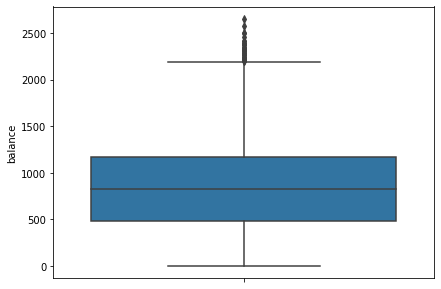

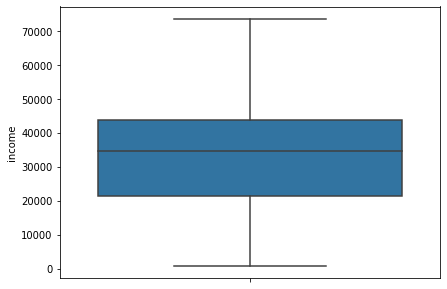

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=Default['balance'])

plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.boxplot(y=Default['income'])

plt.show()

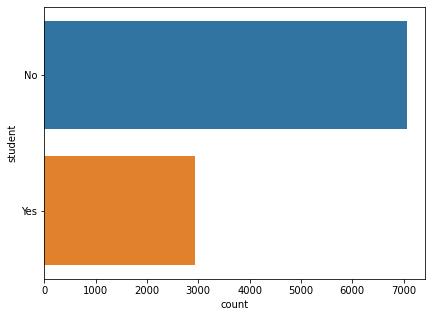

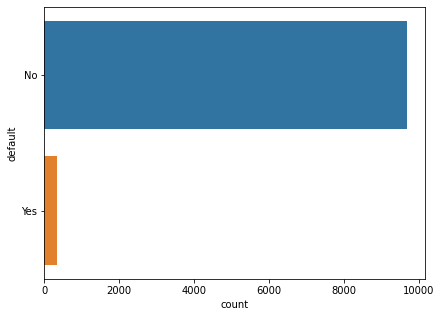

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(y=Default['student'])

plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.countplot(y=Default['default'])

plt.show()


In [ ]:
Default['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [ ]:
Default['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [ ]:
Default['student'].value_counts(normalize=True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

In [ ]:
Default['default'].value_counts(normalize=True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

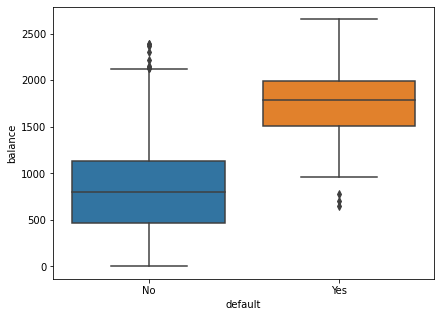

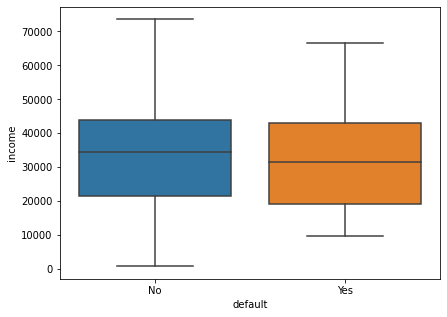

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(Default['default'],Default['balance'])

plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.boxplot(Default['default'],Default['income'])

plt.show()

In [ ]:
pd.crosstab(Default['student'],Default['default'],normalize='index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


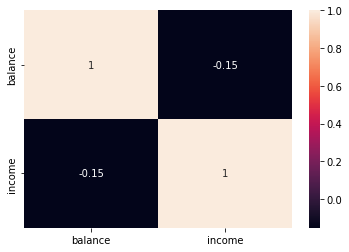

In [ ]:
sns.heatmap(Default[['balance','income']].corr(),annot=True)
plt.show()

In [ ]:
Default.isnull().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

In [ ]:
Q1,Q3= Default['balance'].quantile([.25,.75])
IQR= Q3-Q1
LL= Q1 - 1.5*(IQR)
UL= Q3 + 1.5*(IQR)



In [ ]:
UL

2193.1743093

In [ ]:
df=Default[Default['balance']>UL]

In [ ]:
df

,Unnamed: 0,default,student,balance,income
173,174,Yes,Yes,2205.799521,14271.492250
1136,1137,Yes,No,2499.016750,51504.293960
1160,1161,Yes,Yes,2502.684931,14947.519750
1359,1360,Yes,No,2220.966201,40725.096210
1502,1503,Yes,Yes,2332.878254,11770.234120
1609,1610,Yes,Yes,2269.946966,18021.105950
2096,2097,Yes,Yes,2261.848162,20030.165120
2140,2141,No,Yes,2308.893236,19110.266410
2929,2930,Yes,Yes,2387.314867,28296.914720
3162,3163,Yes,Yes,2415.316994,17429.503370


In [ ]:
df['default'].count()

31

In [ ]:
df['default'].value_counts(normalize=True)

Yes    0.83871
No     0.16129
Name: default, dtype: float64

In [ ]:
df['default'].value_counts()

Yes    26
No      5
Name: default, dtype: int64

In [ ]:
Default['balance']= np.where(Default['balance']>UL,UL,Default['balance'])

<function matplotlib.pyplot.show>

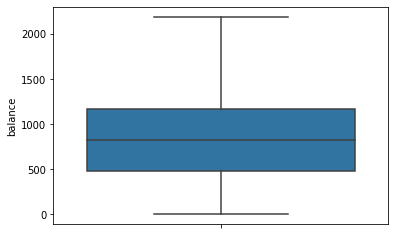

In [ ]:
sns.boxplot(y=Default['balance'])
plt.show

In [ ]:
Default=pd.get_dummies(Default,drop_first=True)

In [ ]:
Default.head()

,Unnamed: 0,balance,income,default_Yes,student_Yes
0,1,729.526495,44361.62507,0,0
1,2,817.180407,12106.13470,0,1
2,3,1073.549164,31767.13895,0,0
3,4,529.250605,35704.49394,0,0
4,5,785.655883,38463.49588,0,0


In [ ]:
Default.columns= ['balance','income','default','student','unnamed']

In [ ]:
Default.head()

,balance,income,default,student,unnamed
0,1,729.526495,44361.62507,0,0
1,2,817.180407,12106.13470,0,1
2,3,1073.549164,31767.13895,0,0
3,4,529.250605,35704.49394,0,0
4,5,785.655883,38463.49588,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = Default.drop('default',axis=1)
y= Default['default']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21,)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(7000, 4)
(3000, 4)


In [ ]:
print(y_train.value_counts(normalize=True).round(2))
print(' ')
print(y_test.value_counts(normalize=True).round(2))

31804.63422    0.0
19032.50901    0.0
42075.04784    0.0
43578.64698    0.0
44207.33303    0.0
              ... 
39761.56184    0.0
17858.06791    0.0
40995.03621    0.0
18251.72562    0.0
46389.34068    0.0
Name: default, Length: 7000, dtype: float64
 
19335.63404    0.0
22128.08020    0.0
36076.07980    0.0
32594.69223    0.0
18310.94552    0.0
              ... 
40847.81131    0.0
43410.38154    0.0
19311.42294    0.0
30093.72754    0.0
30633.84194    0.0
Name: default, Length: 3000, dtype: float64
